In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag ,pos_tag_sents
import matplotlib.pyplot as plt
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import vstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


In [50]:

def remove_link(content):
    '''remove links (using map) and hashtags'''
    a = content[:content.find('http' or 'https')]
    a = re.sub('#\w+', '', a)
    return a

In [51]:
data = pd.read_csv('SemEval2017-task4-dev.subtask-A.english.INPUT.txt', names = ['id', 'label', 'content'], sep ='\t', index_col=False)
data_bu = data

In [52]:
data.content = data.content.map(remove_link)

In [5]:
data.head()

,id,label,content
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...


In [6]:
#remove stop words, after tokenization
stop_words=set(stopwords.words("english"))
stop_words.remove('not')
snowBallStemmer = SnowballStemmer("english")

In [6]:
data.label.value_counts()

neutral     10342
positive     7059
negative     3231
Name: label, dtype: int64

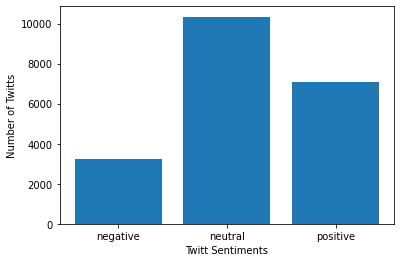

In [7]:
Sentiment_count=data.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'])
plt.xlabel('Twitt Sentiments')
plt.ylabel('Number of Twitts')
plt.show()

In [11]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.token = RegexpTokenizer(r'[a-zA-Z]+')
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles) if len(t)>1]

In [8]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,2),tokenizer = LemmaTokenizer())
text_counts= cv.fit_transform(data['content'])

E:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [62]:
text_counts.shape

(20632, 189442)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['label'], test_size=0.3, random_state=1)

neutral     7242
positive    4960
negative    2240
Name: label, dtype: int64


Text(0.5, 1.0, 'train distribution')

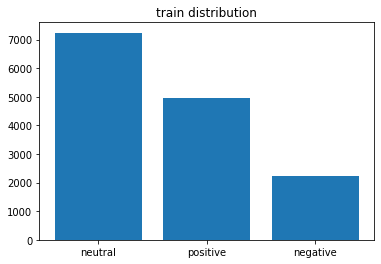

In [12]:
print(y_train.value_counts())
plt.bar(y_train.value_counts().index,y_train.value_counts())
plt.title('train distribution')

neutral     3100
positive    2099
negative     991
Name: label, dtype: int64


Text(0.5, 1.0, 'test distribution')

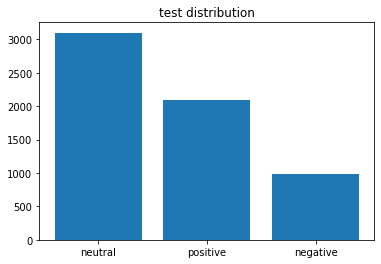

In [13]:
print(y_test.value_counts())
plt.bar(y_test.value_counts().index,y_test.value_counts())
plt.title('test distribution')

In [14]:
type(y_train)

pandas.core.series.Series

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [11]:
y_test = le.fit_transform(y_test)

In [17]:
#print(y_train.)
plt.bar([0,1,2],np.bincount(y_train2))
plt.title('train distribution')

NameError: name 'y_train2' is not defined

In [21]:
X_train2 = vstack([X_train,X_train[y_train==0]])
y_train2 = np.concatenate((y_train,y_train[y_train==0]))

In [415]:
X_train2.shape

(16682, 167222)

In [416]:
y_train2.shape

(16682,)

In [ ]:
#fix imbalance with duplication (just in train set)

In [67]:

#Import scikit-learn metrics module for accuracy calculation
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6193861066235864


In [68]:
dt = DecisionTreeClassifier(random_state=99,max_depth=28)

In [69]:
result = dt.fit(X_train, y_train)

In [70]:
pre = result.predict(X_test)

In [71]:
print("DT Accuracy:",metrics.accuracy_score(y_test, pre))

DT Accuracy: 0.592891760904685


In [ ]:
#KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
model = knn.fit(X_train, y_train)

In [25]:
knn.score(X_train, y_train)

0.6728292480265892

In [26]:
knn.score(X_test, y_test)

0.5180936995153473

In [27]:
pre = knn.predict(X_test)

In [28]:
print(metrics.accuracy_score(y_test, pre))

0.5180936995153473


In [ ]:
#RNN

In [53]:
data_rnn = data

In [54]:
token_df = pd.DataFrame(columns=['id', 'label', 'content'])
word_list = []

In [55]:
#remove stop words, after tokenization
stop_words=set(stopwords.words("english"))
snowBallStemmer = SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()
from nltk import pos_tag ,pos_tag_sents

In [56]:
data_rnn.content = data_rnn.content.map(remove_link)

In [57]:
for i in range(data.shape[0]):
    sample = data.loc[i]['content']
    a= LemmaTokenizer()
    token1 = a(sample)
    #token1 = word_tokenize(sample)
#     token2 =[]
#     for tk in token1:
#         if tk in stop_words:
#             token1.remove(tk)
#         else:
#             token2.append(re.sub('[^a-zA-Z\s]', '', tk))
#     token2 = list(filter(lambda a: a not in ['', 's'], token2))
#     stemWords = [snowBallStemmer.stem(word) for word in token2]
#     token2 = [lemmatizer.lemmatize(x, pos='v') for x in token1]
#     ps_tag = pos_tag(token2)
#     token3 = []
#     for d in ps_tag:
#         d = list(d)
#         if d[1] == 'NN':
#             d[0] = 'NAME'
#         token3.append(d[0])
    
    token_df.at[i] = [data.loc[i]['id'], data.loc[i]['label'],token1]
    word_list += token1
    

In [58]:
#creat dictionary of words:
from collections import Counter
## Build a dictionary that maps words to integers 
counts = Counter(word_list)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word_list: ii for ii, word_list in enumerate(vocab, 1)}
vocab_df = pd.DataFrame(columns=['id', 'label', 'content'])
for i in range(token_df.shape[0]):
    temp = []
    for j in token_df.loc[i]['content']:
        temp.append(vocab_to_int[j])
    vocab_df.at[i] = [token_df.loc[i]['id'], token_df.loc[i]['label'],temp]

In [59]:
len(max(vocab_df['content'], key = len))

36

In [60]:
len(set(word_list))

36628

In [71]:
from tensorflow.keras.preprocessing import sequence
padd_data = sequence.pad_sequences(vocab_df['content'], maxlen=50)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
padd_data, encoded_labels, test_size=0.3, random_state=100)
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
batch_size = 64
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

In [72]:
labels = token_df['label']

In [73]:
import numpy as np

In [74]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

In [86]:
#test train split
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(41449, embedding_size, input_length=50))
model.add(LSTM(128,recurrent_dropout=0.2))

model.add(Dense(3, activation='sigmoid'))
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 50, 32)            1326368   
_________________________________________________________________
lstm_15 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 387       
Total params: 1,409,187
Trainable params: 1,409,187
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [88]:
final_accuracy = 0
#for r in range(10):

num_epochs = 6

model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])
#final_accuracy += scores[1]

#print('final accuracy:\t', final_accuracy/10)

Train on 14378 samples, validate on 64 samples
Epoch 1/6
14378/14378 [==============================] - 96s 7ms/sample - loss: 0.9775 - accuracy: 0.5097 - val_loss: 0.9018 - val_accuracy: 0.5938
Epoch 2/6
14378/14378 [==============================] - 75s 5ms/sample - loss: 0.7622 - accuracy: 0.6457 - val_loss: 0.7977 - val_accuracy: 0.6250
Epoch 3/6
14378/14378 [==============================] - 68s 5ms/sample - loss: 0.5054 - accuracy: 0.7955 - val_loss: 0.7884 - val_accuracy: 0.6406
Epoch 4/6
14378/14378 [==============================] - 70s 5ms/sample - loss: 0.3109 - accuracy: 0.8852 - val_loss: 0.8282 - val_accuracy: 0.7500
Epoch 5/6
14378/14378 [==============================] - 69s 5ms/sample - loss: 0.2061 - accuracy: 0.9255 - val_loss: 0.9416 - val_accuracy: 0.7188
Epoch 6/6
14378/14378 [==============================] - 70s 5ms/sample - loss: 0.1455 - accuracy: 0.9508 - val_loss: 1.0046 - val_accuracy: 0.7344
Test accuracy: 0.62681746


In [36]:
data.head()

,id,label,content
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...


In [45]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [322]:
#remove links (using map) and hashtags:
def remove_link(content):
    a = content[:content.find('http' or 'https')]
    a = re.sub('#\w+', '', a)
    return a

In [46]:
data_xgb = data

In [47]:
data_xgb.content = data_xgb.content.map(remove_link)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,2),tokenizer = LemmaTokenizer())
text_counts= cv.fit_transform(data_xgb['content'])

E:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [50]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

In [51]:
X, y = data_xgb.iloc[:,:-1],data_xgb.iloc[:,-1]

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, encoded_labels, test_size=0.2, random_state=123)

In [53]:
X_train2 = vstack([X_train,X_train[y_train==0]])
y_train2 = np.concatenate((y_train,y_train[y_train==0]))

In [54]:
xg_reg = xgb.XGBClassifier(objective ='objective=multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 40)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.656739


In [56]:
from sklearn import metrics

In [57]:
print(metrics.accuracy_score(y_test, preds))

0.6261206687666586


In [58]:
xg_reg.score(X_test, y_test)

0.6261206687666586

In [13]:
#random forest
#test train split from bayesian part

In [78]:
rndf_classifier = RandomForestClassifier(n_estimators= 20)

In [79]:
rndf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_pred = rndf_classifier.predict(X_test)

In [81]:
metrics.accuracy_score(y_test, y_pred)

0.608562197092084

In [85]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [10,14,16,18], cv = 3)

In [86]:
test_scoreNum

array([[0.58982347, 0.59119236, 0.59027633],
       [0.59086189, 0.60282509, 0.59567837],
       [0.60643821, 0.59410054, 0.60648244],
       [0.59397715, 0.60074782, 0.60835238]])

<BarContainer object of 4 artists>

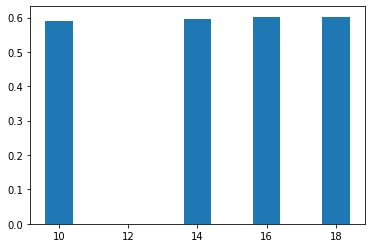

In [93]:
plt.bar([10,14,16,18],np.mean(test_scoreNum,axis=1))

In [95]:
np.mean(test_scoreNum,axis=1)

array([0.59043072, 0.59645512, 0.6023404 , 0.60102578])